In [1]:
import geopandas as gpd

# Load your shapefile
gdf = gpd.read_file(r'C:/Users/zheng/OneDrive - Louisiana State University/Documents/1 GSAPP/1 Computational Modeling/custom analysis tool 3/111trail/111yearbin.shp')

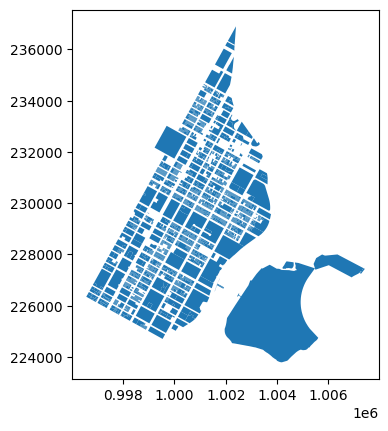

In [2]:
import matplotlib.pyplot as plt

# Plotting the shapefile
gdf.plot()
plt.show()

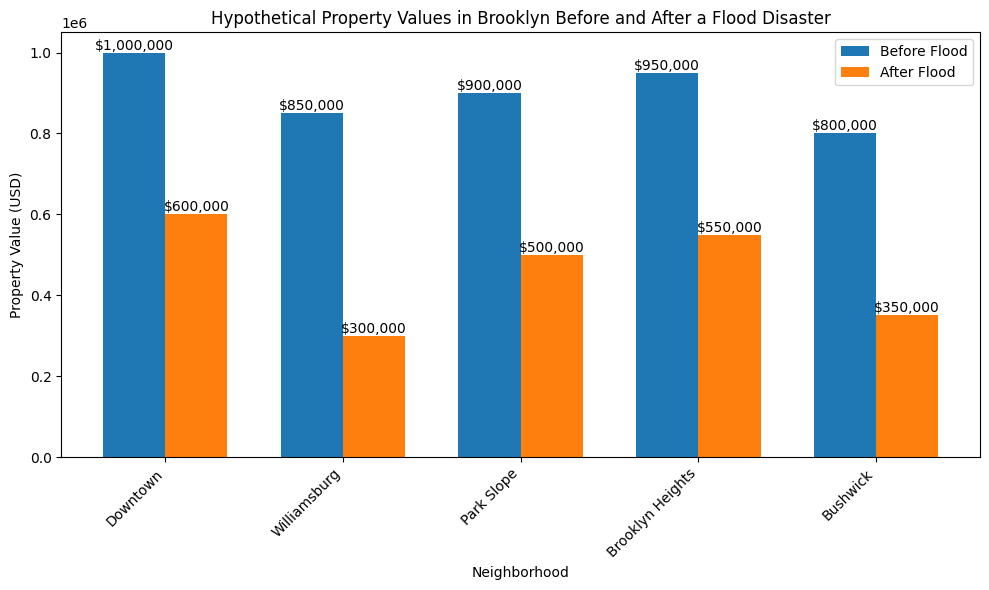

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical data
neighborhoods = ['Downtown', 'Williamsburg', 'Park Slope', 'Brooklyn Heights', 'Bushwick']
values_before_flood = [1000000, 850000, 900000, 950000, 800000]  # in dollars
values_after_flood = [600000, 300000, 500000, 550000, 350000]  # in dollars

# Convert to NumPy arrays for easier manipulation
neighborhoods = np.array(neighborhoods)
values_before_flood = np.array(values_before_flood)
values_after_flood = np.array(values_after_flood)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35
index = np.arange(len(neighborhoods))

# Plot bars
bars1 = ax.bar(index - bar_width / 2, values_before_flood, bar_width, label='Before Flood')
bars2 = ax.bar(index + bar_width / 2, values_after_flood, bar_width, label='After Flood')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Property Value (USD)')
ax.set_title('Hypothetical Property Values in Brooklyn Before and After a Flood Disaster')
ax.set_xticks(index)
ax.set_xticklabels(neighborhoods, rotation=45, ha='right')
ax.legend()

# Adding value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'${height:,.0f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Show plot
plt.tight_layout()
plt.show()


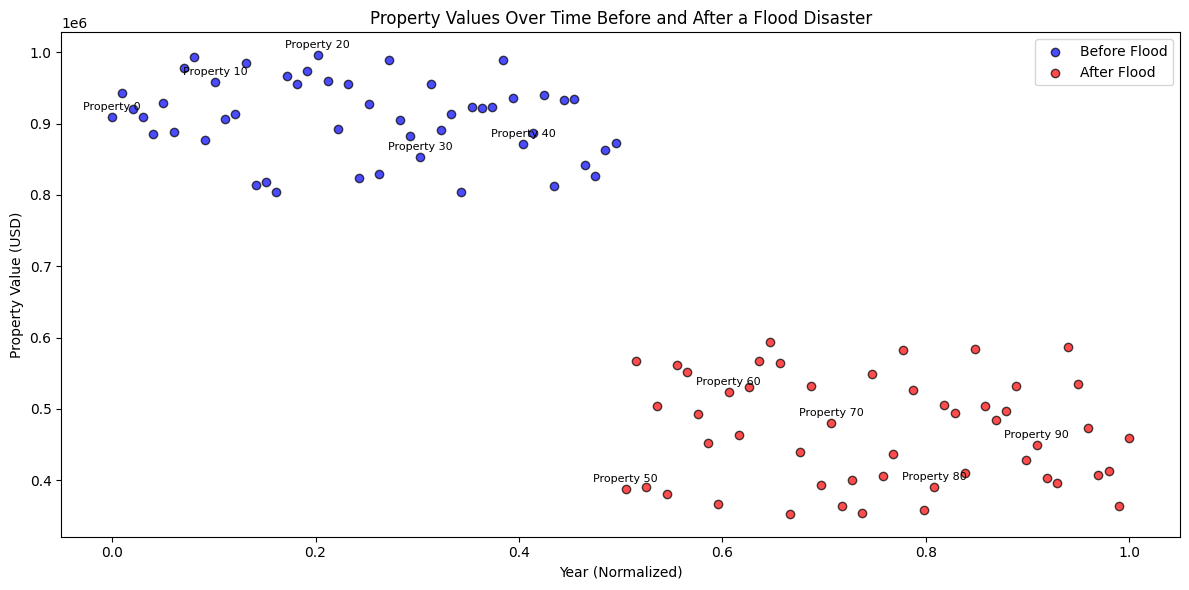

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Hypothetical data for individual properties
np.random.seed(0)  # For reproducibility

# Generate random data
num_properties = 100
time = np.linspace(0, 1, num_properties)  # Normalized time (0 to 1)
values_before_flood = np.random.uniform(800000, 1000000, num_properties)
values_after_flood = np.random.uniform(350000, 600000, num_properties)

# Introduce a flood disaster at time = 0.5
values = np.where(time < 0.5, values_before_flood, values_after_flood)

# Create labels for scatter plot based on time
labels = np.where(time < 0.5, 'Before Flood', 'After Flood')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot for properties before flood
ax.scatter(time[time < 0.5], values[time < 0.5], color='blue', label='Before Flood', alpha=0.7, edgecolor='black')

# Scatter plot for properties after flood
ax.scatter(time[time >= 0.5], values[time >= 0.5], color='red', label='After Flood', alpha=0.7, edgecolor='black')

# Adding labels, title, and legend
ax.set_xlabel('Year (Normalized)')
ax.set_ylabel('Property Value (USD)')
ax.set_title('Property Values Over Time Before and After a Flood Disaster')
ax.legend(loc='upper right')

# Annotate some points with random property names
neighborhoods = [f'Property {i}' for i in range(num_properties)]
for i in range(0, num_properties, 10):  # Annotate every 10th property
    ax.annotate(neighborhoods[i], 
                (time[i], values[i]), 
                textcoords="offset points", 
                xytext=(0, 5), 
                ha='center',
                fontsize=8)

# Display plot
plt.tight_layout()
plt.show()


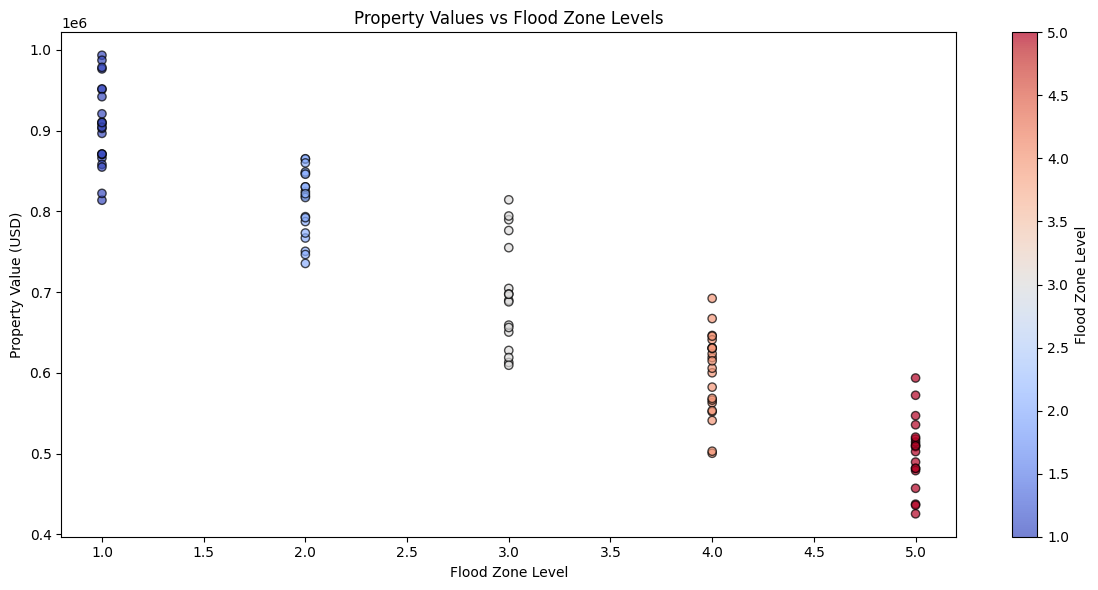

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate hypothetical data
np.random.seed(0)  # For reproducibility

# Number of properties
num_properties = 100

# Simulate flood zone levels (e.g., from 1 (low) to 5 (high))
flood_zone_levels = np.random.randint(1, 6, num_properties)

# Generate property values with a decreasing trend as flood zone level increases
property_values = 1000000 - flood_zone_levels * 100000 + np.random.normal(0, 50000, num_properties)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot
scatter = ax.scatter(flood_zone_levels, property_values, alpha=0.7, edgecolor='black', c=flood_zone_levels, cmap='coolwarm')

# Adding labels, title, and colorbar
ax.set_xlabel('Flood Zone Level')
ax.set_ylabel('Property Value (USD)')
ax.set_title('Property Values vs Flood Zone Levels')

# Add a colorbar to show the relationship between color and flood zone level
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Flood Zone Level')

# Display plot
plt.tight_layout()
plt.show()

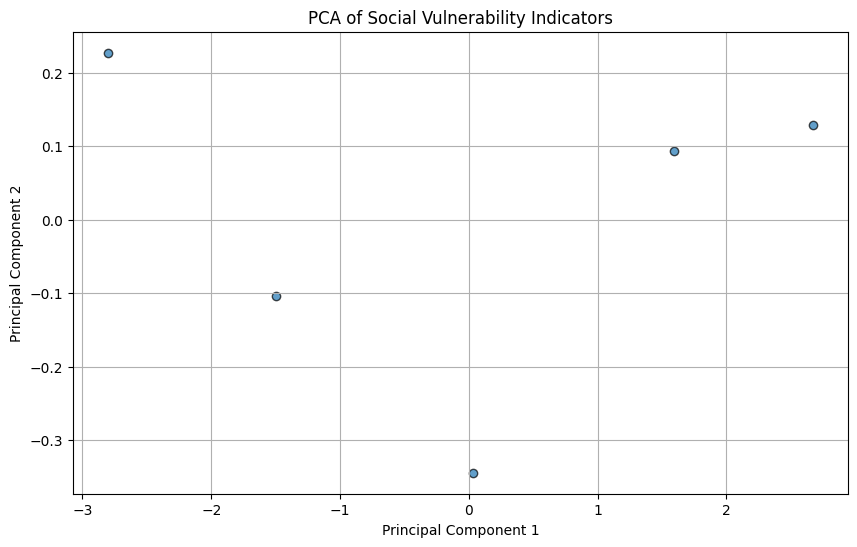

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample data: rows = regions, columns = social indicators
data = pd.DataFrame({
    'Income': [50000, 40000, 30000, 60000, 70000],
    'Education': [12, 10, 8, 16, 18],
    'Housing Quality': [5, 3, 2, 7, 8],
    'Age': [40, 50, 60, 35, 30]
})

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(data_scaled)

# Create DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolor='k')
plt.title('PCA of Social Vulnerability Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
